# Imports

In [ ]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
from statsmodels.formula.api import ols
gg.theme_set(gg.theme_classic)

In [ ]:
from Functions import get_ages_cols, get_param_names, get_category_dict

## Directories etc.

In [3]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
data_save_path = os.path.join(data_path, "all_data")
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [4]:
ages_cols = get_ages_cols()
param_names = get_param_names()
category_dict = get_category_dict()

In [5]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

# Do RT differences between males and females differ by puberty category?

In [6]:
# rt_dat = all_data_z[ages_cols + ['{}_RT'.format(t) for t in ['ps', 'bf', 'rl']]]
rt_dat = all_data[ages_cols + ['{}_RT'.format(t) for t in ['ps', 'bf', 'rl']]]
rt_dat_long = rt_dat.melt(id_vars=ages_cols).rename(columns={'value': 'RT'})
rt_dat_long['task'] = rt_dat_long['variable'].apply(lambda x : x[:2])
rt_dat_long['logRT'] = np.log(rt_dat_long['RT'])
rt_dat_long

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,variable,RT,task,logRT
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,ps_RT,0.641099,ps,-0.444571
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,ps_RT,0.518706,ps,-0.656417
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100,ps_RT,0.241270,ps,-1.421839
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100,ps_RT,0.392027,ps,-0.936425
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50,ps_RT,0.484234,ps,-0.725187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,0.763650,rl,-0.269646
737,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,rl_RT,0.803110,rl,-0.219264
738,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,1.059800,rl,0.058080
739,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,0.940890,rl,-0.060929


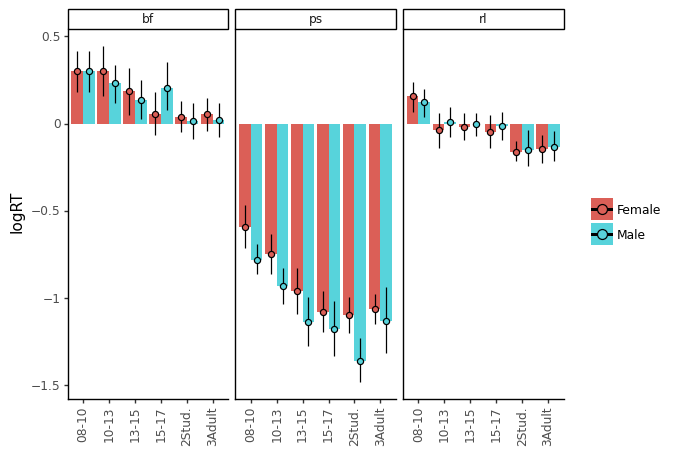

<ggplot: (96992901262)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\8_RTsOverAgeGroup.png


In [7]:
g = (gg.ggplot(rt_dat_long, gg.aes('age_group_', 'logRT', fill='sex'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='', fill='')
     + gg.facet_grid('~ task')
    )
print(g)
g.save(os.path.join(plot_save_path, '8_RTsOverAgeGroup.png'))

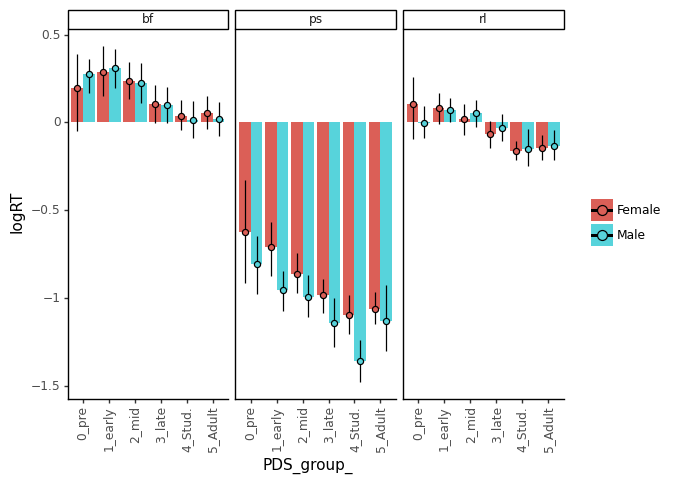

<ggplot: (96992857829)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\8_RTsOverPDSGroup.png


In [8]:
g_p = g + gg.aes('PDS_group_')
g_p.data = g.data.loc[rt_dat_long.PDS_group_.apply(lambda x : True if type(x) == str else False)]
print(g_p)
g.save(os.path.join(plot_save_path, '8_RTsOverPDSGroup.png'))

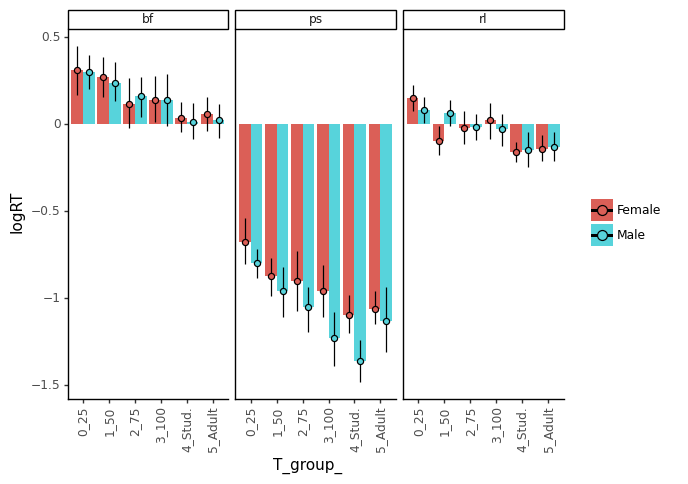

<ggplot: (96992882857)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\8_RTsOverTGroup.png


In [9]:
g_t = g + gg.aes('T_group_')
g_t.data = g.data.loc[rt_dat_long.T_group_.apply(lambda x : True if type(x) == str else False)]
print(g_t)
g.save(os.path.join(plot_save_path, '8_RTsOverTGroup.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


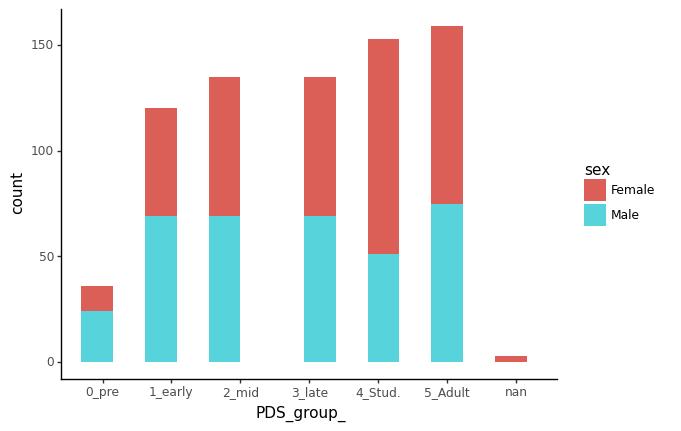

<ggplot: (96994589645)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


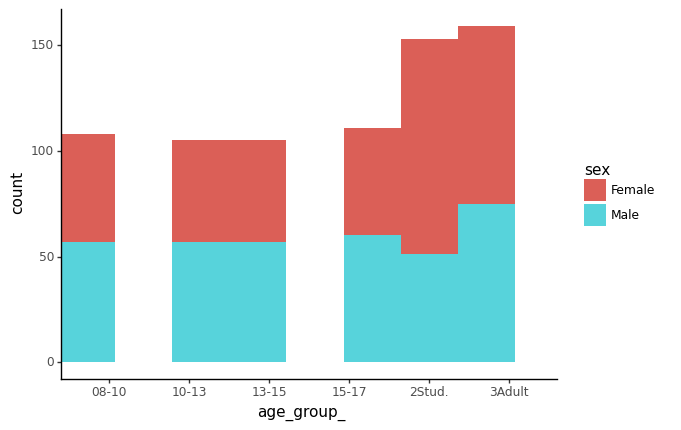

<ggplot: (96994556404)>


In [12]:
# Checking that the groups are balanced between males / females
g = (gg.ggplot(rt_dat_long, gg.aes('PDS_group_', fill='sex'))
 + gg.geom_histogram()
)
print(g)
# print(g + gg.aes(x='T_group_'))
print(g + gg.aes(x='age_group_'))

## Stats

In [17]:
rt_dat_long['PreciseYrs2'] = np.square(rt_dat_long['PreciseYrs'])
rt_dat_long

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,variable,RT,task,logRT,PreciseYrs2
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,ps_RT,0.641099,ps,-0.444571,74.945107
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,ps_RT,0.518706,ps,-0.656417,159.717002
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100,ps_RT,0.241270,ps,-1.421839,211.512327
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100,ps_RT,0.392027,ps,-0.936425,271.922583
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50,ps_RT,0.484234,ps,-0.725187,125.574958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,0.763650,rl,-0.269646,498.777778
737,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,rl_RT,0.803110,rl,-0.219264,403.340278
738,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,1.059800,rl,0.058080,351.562500
739,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,rl_RT,0.940890,rl,-0.060929,476.694444


In [29]:
formula = 'logRT ~ PreciseYrs + PreciseYrs2 + sex'
for task in np.unique(rt_dat_long['task']):
    fit = ols(data=rt_dat_long.loc[rt_dat_long['task'] == task], formula=formula).fit()
    print(task, fit.summary())

bf                             OLS Regression Results                            
Dep. Variable:                  logRT   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     11.98
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           2.42e-07
Time:                        12:42:29   Log-Likelihood:                -21.117
No. Observations:                 247   AIC:                             50.23
Df Residuals:                     243   BIC:                             64.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8567      0.176      4.879   